## Pandas Profiling:

In this notebook, I am going to look specifically at each columns and find ways to make sure I fill in most of the variables as much as possible.

I will fill the nas with multiple methods so that we don't have empty spaces.

I am working along with tableau prep to see the distributions of the variables.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import missingno as mno

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#let's read in the data
dt = pd.read_csv('third_output.csv')

In [3]:
dt.head()

,Who_performed_the_circumcision_x,Place_where_circumcision_was_done_x,Desire_for_more_children_y,Preferred_waiting_time_for_birth_of_a/another_child_y,Number_of_women_fathered_children_with_y,"Reduce_risk_of_getting_HIV:_have_1_sex_partner_only,_who_has_no_other_partners_y",A_healthy_looking_person_can_have_HIV_x,Know_a_place_to_get_HIV_test_y,last_2partner_hiv_status,Ever_been_tested_for_HIV_y,...,total_life_time_number_of_partners,ever_forced_for_sex,hiv_test_results,number_of_testing_times,ever_test_as_couple,careful_about_hiv,chances_getting_hiv,who_can_give_u_hiv,respondent_circumised,paid_for_sex_last_12months
0,NaN,NaN,8.0,NaN,0,1,1,1,NaN,0,...,1.0,NaN,NaN,NaN,NaN,more careful,low,boy/girlfriend,no,NaN
1,NaN,NaN,NaN,NaN,1,1,1,1,negative,0,...,2.0,no,NaN,1.0,yes,more careful,high,spouse,NaN,NaN
2,2.0,1.0,NaN,NaN,0,1,1,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,1.0,NaN,NaN,0,1,1,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0,1,1,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


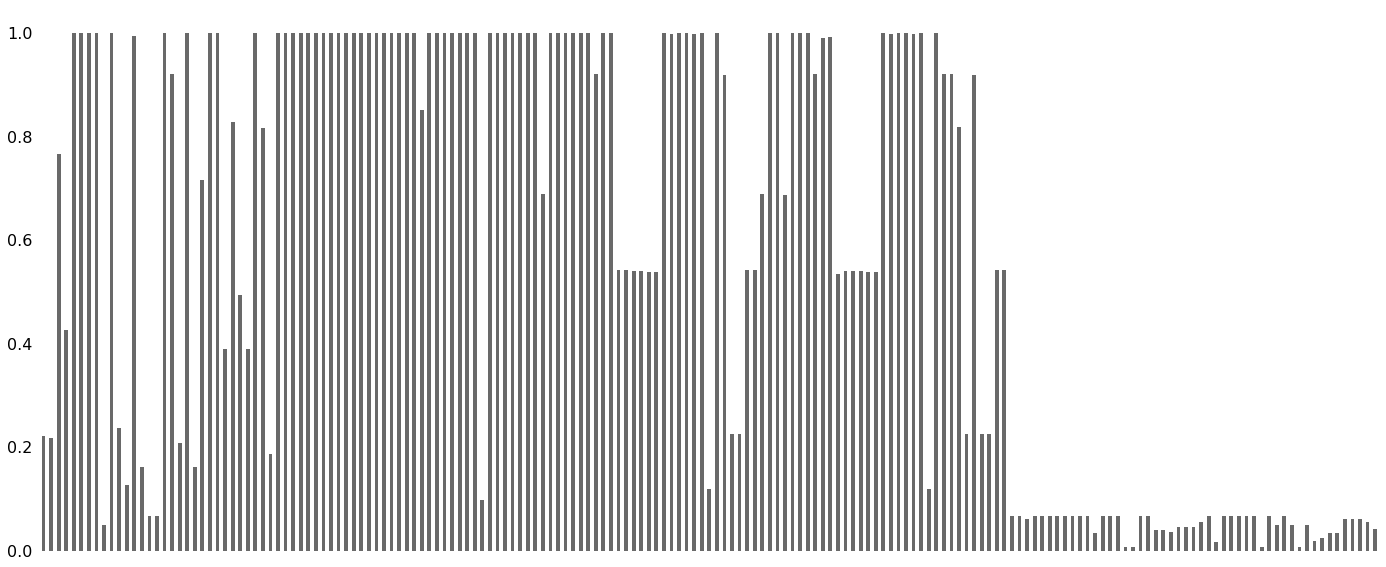

In [4]:
#let's see how the structure of the data is
mno.bar(dt)

### Observations:

- We cna see that we have a couple of columns with a lot of missing values,we will have to take care of that.
- We also have columns with a descent number of columns with good data.
- What now matters is the method we use to deal with the columns, do we drop, fill with mean, mode or fillforward, it will all depend on the perception we get as we move forward.

### Variables:

In [5]:
#shape of the data
dt.shape

(859, 177)

In [6]:
list(dt.columns)

['Who_performed_the_circumcision_x',
 'Place_where_circumcision_was_done_x',
 'Desire_for_more_children_y',
 'Preferred_waiting_time_for_birth_of_a/another_child_y',
 'Number_of_women_fathered_children_with_y',
 'Reduce_risk_of_getting_HIV:_have_1_sex_partner_only,_who_has_no_other_partners_y',
 'A_healthy_looking_person_can_have_HIV_x',
 'Know_a_place_to_get_HIV_test_y',
 'last_2partner_hiv_status',
 'Ever_been_tested_for_HIV_y',
 'used_condom_last_sex',
 'Brand_of_condom_used_y',
 'Children_should_be_taught_about_condoms_to_avoid_AIDS_x',
 'Source_of_condoms_x',
 'sexualpartners_includinspouse',
 'daughters_elsewhere.1',
 'Ever_been_married_or_in_union_y',
 'Have_ever_paid_anyone_in_exchange_for_sex_x',
 'Used_condom_every_time_had_sex_with_3rd_to_most_recent_partner_in_last_12_months_x',
 'Contraceptive_method_currently_used_y',
 'Updated_source_of_condom',
 'Updated_weight_for_domestic_violence',
 'Contraceptive_method_currently_used_x',
 'Highest_educational_level_attained',
 'Upd

In [7]:
## make a copy
data = dt.copy()

### Variables

In [138]:
data['sex_of_household_head'].unique()

array(['male', nan, 'female'], dtype=object)

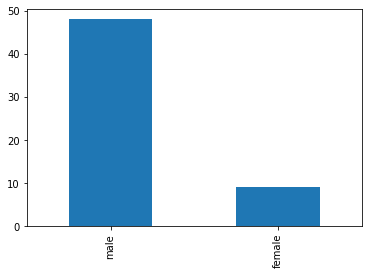

In [139]:
data['sex_of_household_head'].value_counts().plot(kind='bar')

In [140]:
data['sex_of_household_head'] = data['sex_of_household_head'].replace({'female':0,'male':1})

In [101]:
def fill(col):
    print("Working ...")
    data[col] = data[col].fillna(data[col].median())
    print("Done!")
    #print the graph
    plt.title(col)
    data[col].value_counts().plot(kind='barh')
    
    #update the csv
    print("Updating csv")
    data.to_csv("fin_data.csv",index=False)

Working ...
Done!
Updating csv


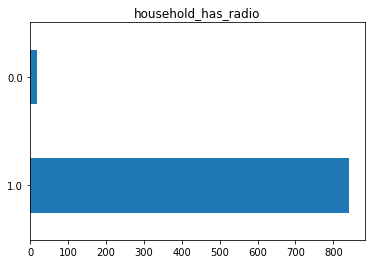

In [141]:
fill("household_has_radio")

In [117]:
data.filter(like ='Wife/partner').fillna(data.median()).to_csv("fin_data.csv",index=False)

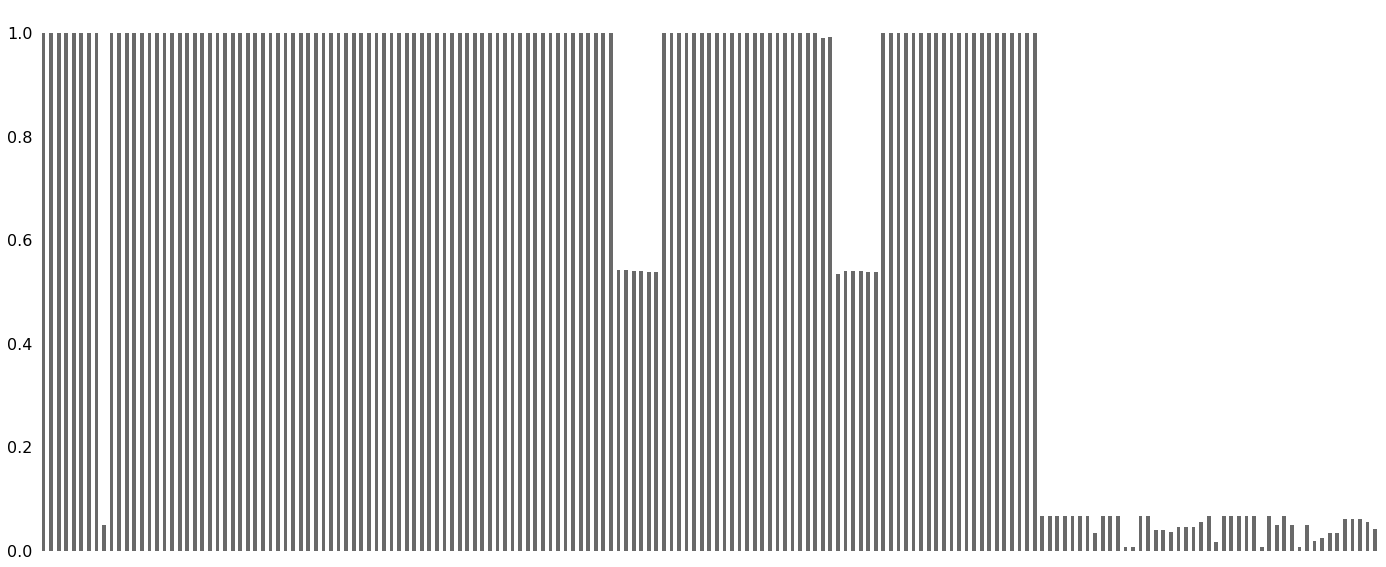

In [142]:
mno.bar(data)